In [242]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [243]:
data = pd.read_csv("HIGGS_train.csv",header=None, names=["Prediction","lepton pT", "lepton eta", "lepton phi", "missing energy magnitude", "missing energy phi", "jet 1 pt", "jet 1 eta", "jet 1 phi", "jet 1 b-tag", "jet 2 pt", "jet 2 eta", "jet 2 phi","jet 2 b-tag", "jet 3 pt", "jet 3 eta", "jet 3 phi", "jet 3 b-tag", "jet 4 pt", "jet 4 eta", "jet 4 phi", "jet 4 b-tag", "m jj","m jjj", "m lv", "m jlv", "m bb", "m wbb", "m wwbb"])

print(data)

C:\Users\reemh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (8,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


        Prediction  lepton pT  lepton eta  lepton phi  \
0              1.0      0.869      -0.635       0.226   
1              1.0      0.908       0.329       0.359   
2              1.0      0.799       1.470      -1.640   
3              0.0      1.340      -0.877       0.936   
4              1.0      1.110       0.321       1.520   
...            ...        ...         ...         ...   
599995         0.0      0.680       0.223      -0.757   
599996         1.0      1.610      -1.620       0.212   
599997         1.0      1.070       0.364       0.344   
599998         1.0      1.180      -0.173      -1.460   
599999         0.0      0.771      -0.133      -1.020   

        missing energy magnitude  missing energy phi  jet 1 pt  jet 1 eta  \
0                          0.327              -0.690     0.754     -0.249   
1                          1.500              -0.313     1.100     -0.558   
2                          0.454               0.426     1.100      1.280   
3      

In [244]:
#deleting row that contains the missing data 
data = data.dropna()
print(data)

        Prediction  lepton pT  lepton eta  lepton phi  \
0              1.0      0.869      -0.635       0.226   
1              1.0      0.908       0.329       0.359   
2              1.0      0.799       1.470      -1.640   
3              0.0      1.340      -0.877       0.936   
4              1.0      1.110       0.321       1.520   
...            ...        ...         ...         ...   
599995         0.0      0.680       0.223      -0.757   
599996         1.0      1.610      -1.620       0.212   
599997         1.0      1.070       0.364       0.344   
599998         1.0      1.180      -0.173      -1.460   
599999         0.0      0.771      -0.133      -1.020   

        missing energy magnitude  missing energy phi  jet 1 pt  jet 1 eta  \
0                          0.327              -0.690     0.754     -0.249   
1                          1.500              -0.313     1.100     -0.558   
2                          0.454               0.426     1.100      1.280   
3      

In [245]:
# Drop duplicates
data =data.drop_duplicates()

print(data)

        Prediction  lepton pT  lepton eta  lepton phi  \
0              1.0      0.869      -0.635       0.226   
1              1.0      0.908       0.329       0.359   
2              1.0      0.799       1.470      -1.640   
3              0.0      1.340      -0.877       0.936   
4              1.0      1.110       0.321       1.520   
...            ...        ...         ...         ...   
599995         0.0      0.680       0.223      -0.757   
599996         1.0      1.610      -1.620       0.212   
599997         1.0      1.070       0.364       0.344   
599998         1.0      1.180      -0.173      -1.460   
599999         0.0      0.771      -0.133      -1.020   

        missing energy magnitude  missing energy phi  jet 1 pt  jet 1 eta  \
0                          0.327              -0.690     0.754     -0.249   
1                          1.500              -0.313     1.100     -0.558   
2                          0.454               0.426     1.100      1.280   
3      

In [246]:
# Find columns with non-float data types
non_float_columns = data.select_dtypes(exclude=['float']).columns.tolist()

# Convert non-float columns to numeric data type
for col in non_float_columns:
    data.loc[:, col] = pd.to_numeric(data[col], errors='coerce')

# Find rows with non-float values
nonfloat_rows = data[data.isnull().any(axis=1)]

# Print the row numbers and column names with non-float values
for index, row in nonfloat_rows.iterrows():
    nonfloat_columns = row.index[row.isnull()].tolist()
    print(f"Row {index} contains non-float values in columns: {nonfloat_columns}")
    
# Delete rows with non-float values

data.drop(nonfloat_rows.index, inplace=True)

# Print the cleaned data
print(data)

Row 261026 contains non-float values in columns: ['jet 1 phi']
Row 490959 contains non-float values in columns: ['jet 4 b-tag']
Row 490960 contains non-float values in columns: ['jet 4 b-tag']
        Prediction  lepton pT  lepton eta  lepton phi  \
0              1.0      0.869      -0.635       0.226   
1              1.0      0.908       0.329       0.359   
2              1.0      0.799       1.470      -1.640   
3              0.0      1.340      -0.877       0.936   
4              1.0      1.110       0.321       1.520   
...            ...        ...         ...         ...   
599995         0.0      0.680       0.223      -0.757   
599996         1.0      1.610      -1.620       0.212   
599997         1.0      1.070       0.364       0.344   
599998         1.0      1.180      -0.173      -1.460   
599999         0.0      0.771      -0.133      -1.020   

        missing energy magnitude  missing energy phi  jet 1 pt  jet 1 eta  \
0                          0.327             

In [247]:
# Add new features
data['Delta phi jet 1 jet 2'] = abs(data['jet 1 phi'] - data['jet 2 phi'])
data['Delta eta jet 1 jet 2'] = abs(data['jet 1 eta'] - data['jet 2 eta'])
#add a column to the dataset that is the sum of the b-tags for the four jets
data['b-tag sum'] = data['jet 1 b-tag'] + data['jet 2 b-tag'] + data['jet 3 b-tag'] + data['jet 4 b-tag']

#add a column to the dataset that is the sum of the pt values for the four jets
data['jet pt sum'] = data['jet 1 pt'] + data['jet 2 pt'] + data['jet 3 pt'] + data['jet 4 pt']

#add a column to the dataset that is the sum of the eta values for the four jets
data['jet eta sum'] = data['jet 1 eta'] + data['jet 2 eta'] + data['jet 3 eta'] + data['jet 4 eta']

#add a column to the dataset that is the sum of the phi values for the four jets
data['jet phi sum'] = data['jet 1 phi'] + data['jet 2 phi'] + data['jet 3 phi'] + data['jet 4 phi']

#add a column to the dataset that is the sum of the pt values for the two leptons
data['lepton pt sum'] = data['lepton pT'] + data['lepton pT']

#add a column to the dataset that is the sum of the eta values for the two leptons
data['lepton eta sum'] = data['lepton eta'] + data['lepton eta']

#add a column to the dataset that is the sum of the phi values for the two leptons
data['lepton phi sum'] = data['lepton phi'] + data['lepton phi']

#add a column containg the cube of the m_bb column
data['m bb^4'] = data['m bb']**3
data['m wbb^3'] = data['m wbb']**2


print(data)


        Prediction  lepton pT  lepton eta  lepton phi  \
0              1.0      0.869      -0.635       0.226   
1              1.0      0.908       0.329       0.359   
2              1.0      0.799       1.470      -1.640   
3              0.0      1.340      -0.877       0.936   
4              1.0      1.110       0.321       1.520   
...            ...        ...         ...         ...   
599995         0.0      0.680       0.223      -0.757   
599996         1.0      1.610      -1.620       0.212   
599997         1.0      1.070       0.364       0.344   
599998         1.0      1.180      -0.173      -1.460   
599999         0.0      0.771      -0.133      -1.020   

        missing energy magnitude  missing energy phi  jet 1 pt  jet 1 eta  \
0                          0.327              -0.690     0.754     -0.249   
1                          1.500              -0.313     1.100     -0.558   
2                          0.454               0.426     1.100      1.280   
3      

In [248]:
# Calculate z-scores for each column
z_scores = np.abs((data - data.mean()) / data.std())

# Define threshold for z-scores
z_threshold = 2

# Remove rows with z-score greater than threshold in any column
outlier_rows = data[(z_scores > z_threshold).any(axis=1)]
data = data[(z_scores <= z_threshold).all(axis=1)]

# Print number of outlier rows removed
print(f"{len(outlier_rows)} outlier rows removed.")
print(data)

301734 outlier rows removed.
        Prediction  lepton pT  lepton eta  lepton phi  \
0              1.0      0.869     -0.6350     0.22600   
2              1.0      0.799      1.4700    -1.64000   
4              1.0      1.110      0.3210     1.52000   
5              0.0      1.600     -0.6080     0.00707   
6              1.0      0.409     -1.8800    -1.03000   
...            ...        ...         ...         ...   
599992         1.0      0.740     -1.1200     1.15000   
599993         0.0      1.150     -0.0692    -0.24300   
599997         1.0      1.070      0.3640     0.34400   
599998         1.0      1.180     -0.1730    -1.46000   
599999         0.0      0.771     -0.1330    -1.02000   

        missing energy magnitude  missing energy phi  jet 1 pt  jet 1 eta  \
0                          0.327              -0.690     0.754    -0.2490   
2                          0.454               0.426     1.100     1.2800   
4                          0.883              -1.210   

In [249]:
# extract the features and target variable
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values
print(X)
print(y)

[[ 0.869      -0.635       0.226      ...  0.452       0.37636705
   0.978121  ]
 [ 0.799       1.47       -1.64       ... -3.28        0.51778163
   0.749956  ]
 [ 1.11        0.321       1.52       ...  3.04        1.442897
   0.760384  ]
 ...
 [ 1.07        0.364       0.344      ...  0.688       0.61847021
   0.824464  ]
 [ 1.18       -0.173      -1.46       ... -2.92        0.41349362
   0.549081  ]
 [ 0.771      -0.133      -1.02       ... -2.04        0.132651
   1.0816    ]]
[1. 1. 1. ... 1. 1. 0.]


In [250]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#shuffle the data
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [251]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create the logistic regression model
logistic_regression_model = LogisticRegression(penalty='l1', solver='saga')

# Fit the model on the training data
logistic_regression_model.fit(X_train_scaled, y_train)

# Make predictions on the training data
train_predictions = logistic_regression_model.predict(X_train_scaled)

# Calculate the accuracy of the model on the training data
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)

# Make predictions on the testing data
predictions = logistic_regression_model.predict(X_test_scaled)

# Calculate the accuracy of the model
test_accuracy = accuracy_score(y_test, predictions)
print("Testing Accuracy:",test_accuracy)


Training Accuracy: 0.6674362568159128
Testing Accuracy: 0.667446913359018


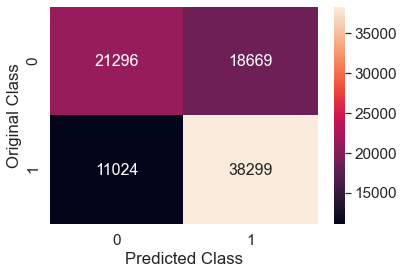

In [252]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,auc,roc_auc_score
confusion_matrix(y_test,logistic_regression_model.predict(X_test_scaled))
plt.figure(figsize=(6,4))
df_ = pd.DataFrame(confusion_matrix(y_test, logistic_regression_model.predict(X_test_scaled)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [253]:


# Generate the classification report
report = classification_report(y_test, logistic_regression_model.predict(X_test_scaled))

# Print the classification report
print(report)

              precision    recall  f1-score   support

         0.0       0.66      0.53      0.59     39965
         1.0       0.67      0.78      0.72     49323

    accuracy                           0.67     89288
   macro avg       0.67      0.65      0.65     89288
weighted avg       0.67      0.67      0.66     89288

